# Check augmentation with edges pipeline results

In [43]:
import os

os.chdir("/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder")

In [44]:
!pwd

/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder


In [45]:
import albumentations as A
import matplotlib.pyplot as plt
from pathlib import Path

from scripts.training import augmentations as aug
from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
DATASET_PATH_BASE = Path("/media/aneta/ADATA HD650/GSN")
DATASET_PATH = os.path.join(DATASET_PATH_BASE, "data", "dataset", "train")

In [47]:
def draw_sample(index):
    fig, axis = plt.subplots(8, 4, figsize=(10, 20))

    for i in range(8):
        img, edge = dataset[index]
        img2, edge2 = dataset[index]
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(edge)
        axis[i, 2].imshow(img2)
        axis[i, 3].imshow(edge2)

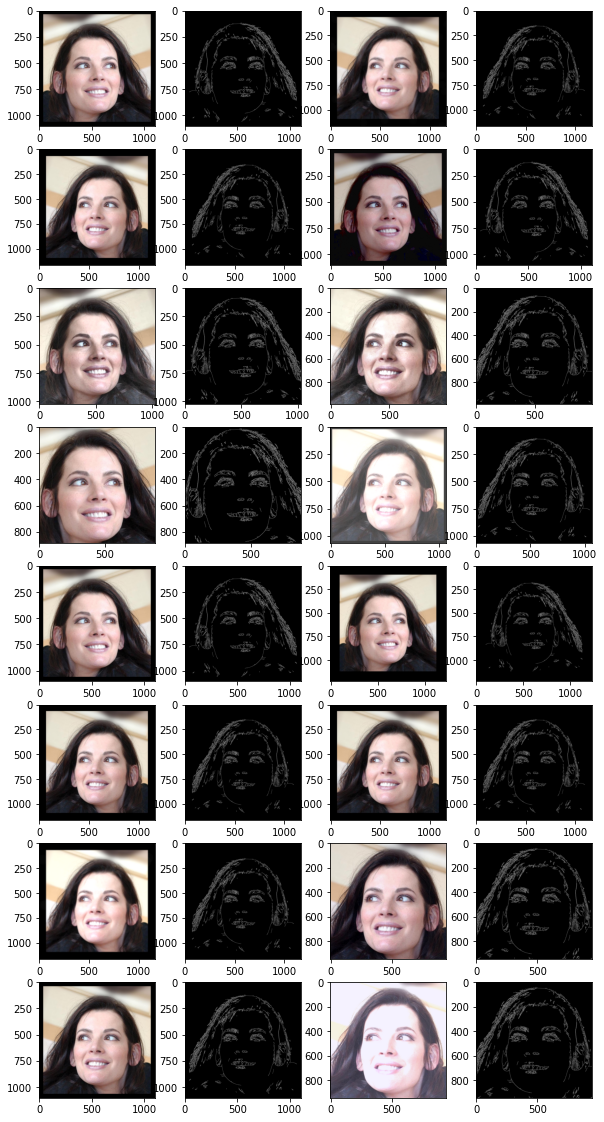

In [54]:
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=True)
aug_pipeline = aug.AugmentationPipelineWithEdges()
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"])
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"], resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"])
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"])
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False)

dataset = dl.CelebAFaceAutoencoderDatasetWithEdges(
    dataset_root=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
)

draw_sample(48)